In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:

engine = create_engine("sqlite:///Resources/hawaii.sqlite")



In [4]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [5]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [6]:
Measurment = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [7]:
columns_stations = inspector.get_columns('station')
for y in columns_stations:
    print(y['name'], y["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
columns = inspector.get_columns('measurement')
for x in columns:
    print(x['name'], x["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
sel = [Measurment.date, 
       Measurment.prcp]

prcp_date = session.query(*sel).all()

In [10]:
# last entry in list
len(prcp_date)

19550

In [11]:
# create data frame with filters
import datetime as dt
import numpy as np


weather_df = pd.DataFrame(prcp_date[19185:19550], columns=['Date', 'Precipitation'])
weather_df.set_index('Date', inplace=True, )
weather_df.head(10)

Precipitation
Date                     
2016-08-07           1.30
2016-08-08           0.02
2016-08-09           0.56
2016-08-10           0.00
2016-08-11           0.04
2016-08-12           0.39
2016-08-13           0.45
2016-08-14           0.75
2016-08-15           0.95
2016-08-16           0.85

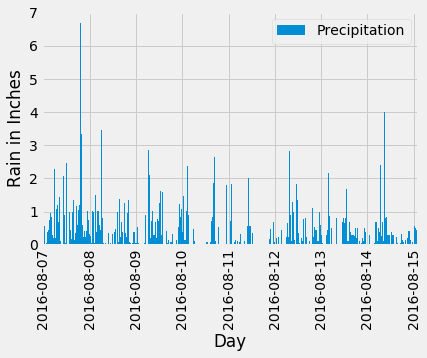

In [12]:
weather_df.plot.bar(width=1)


plt.xticks(np.arange(1,365,45),rotation=90)
plt.xlabel("Day")
plt.ylabel("Rain in Inches")
plt.show()

In [13]:
weather_df.describe()

Precipitation
count     344.000000
mean        0.460494
std         0.713201
min         0.000000
25%         0.010000
50%         0.215000
75%         0.657500
max         6.700000

In [14]:
station_count = session.query(Station.station).count()
station_count

9

In [15]:
station_groupby= session.query(Measurment.station, func.count(Measurment.date)).group_by(Measurment.station).order_by(func.count(Measurment.date).desc()).all()
station_groupby

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
highest = session.query(func.max(Measurment.tobs)).filter(Measurment.station=="USC00519281").all()
lowest = session.query(func.min(Measurment.tobs)).filter(Measurment.station=="USC00519281").all()
avg = session.query(func.avg(Measurment.tobs)).filter(Measurment.station=="USC00519281").all()
print(f'Station USC00519281 Lowest temp is {lowest}, Highest temp is {highest} and average temp is {avg}')

Station USC00519281 Lowest temp is [(54.0,)], Highest temp is [(85.0,)] and average temp is [(71.66378066378067,)]


In [17]:
session.query(Measurment.date).filter(Measurment.station=="USC00519281").order_by(Measurment.date.desc()).first()

('2017-08-18')

In [18]:
active_station = session.query(Measurment.date, Measurment.tobs).filter(Measurment.station=="USC00519281").filter(Measurment.date > '2016-08-18').all()

station_USC00519281_df = pd.DataFrame(active_station, columns=['Date', 'Temp'])
station_USC00519281_df.set_index('Date', inplace=True, )
station_USC00519281_df

Temp
Date            
2016-08-19  79.0
2016-08-20  81.0
2016-08-21  79.0
2016-08-22  78.0
2016-08-23  77.0
...          ...
2017-08-14  77.0
2017-08-15  77.0
2017-08-16  76.0
2017-08-17  76.0
2017-08-18  79.0

[356 rows x 1 columns]

Text(0.5, 0, 'Temp(f)')

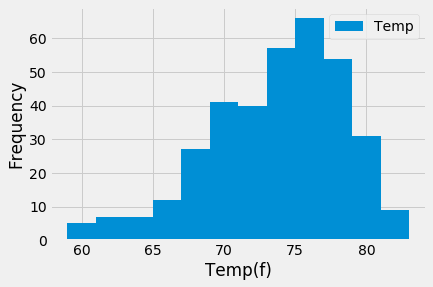

In [19]:
station_USC00519281_df.plot.hist(bins=12)
plt.xlabel("Temp(f)")